### 1) Theshold current v/s Size - Hardware Rupture Current

[0.00785398 0.00801345 0.00817452 0.00833719 0.00850147 0.00866735
 0.00883483 0.00900391 0.0091746  0.00934689 0.00952078 0.00969627
 0.00987337 0.01005207 0.01023237 0.01041428 0.01059779 0.0107829
 0.01096961 0.01115793 0.01134785 0.01153937 0.01173249 0.01192722
 0.01212355 0.01232148 0.01252101 0.01272215 0.01292489 0.01312924
 0.01333518 0.01354273 0.01375188 0.01396263 0.01417499 0.01438895
 0.01460451 0.01482168 0.01504044 0.01526081 0.01548279 0.01570636
 0.01593154 0.01615832 0.0163867  0.01661669 0.01684828 0.01708147
 0.01731626 0.01755266 0.01779066 0.01803026 0.01827147 0.01851427
 0.01875868 0.0190047  0.01925231 0.01950153 0.01975235 0.02000477
 0.0202588  0.02051443 0.02077166 0.0210305  0.02129093 0.02155297
 0.02181662 0.02208186 0.02234871 0.02261716 0.02288721 0.02315887
 0.02343213 0.02370699 0.02398345 0.02426152 0.02454119 0.02482246
 0.02510534 0.02538981 0.02567589 0.02596358 0.02625286 0.02654375
 0.02683624 0.02713033 0.02742603 0.02772333 0.02802223 0.02832

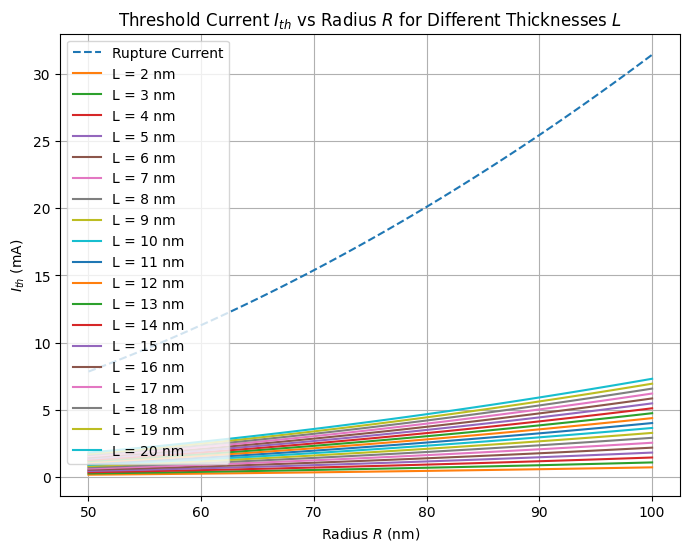

In [5]:
import numpy as np
from scipy.constants import mu_0
import matplotlib.pyplot as plt

m_e = 9.1e-31

c = 0.02
gyro_ratio = -1.76e11 # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = -2.8e10 # Gyroratio (Hz/T)
alpha_g = 0.01 # Gilbert Damping Constant
aplied_field = 0.400 # Applied Field (Tesla)
saturation_magnetization = 0.73 # Saturation Magnetization (T)
saturation_magnetization_A_M = saturation_magnetization / mu_0
epsilon = 0.5 # Spin Polarization Efficiency
lande_factor = -2.002 # Electron Lande Factor 
bhor_magneton = 9.27e-24 # Bohr magneton (J/T)
e = -1.602e-19 # Electron Charge (C)
L = 5e-9

# Función para calcular I_th y T_relax
def Compute_I_th(L, R):
        omega_0 = gyro_ratio * (aplied_field -  saturation_magnetization)
        gama_g = alpha_g * omega_0
        sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))
        I_th = gama_g / sigma
        return  I_th 

R_values = np.linspace(50e-9,100e-9,100)

# List of L values
L_values = np.linspace(2e-9,20e-9,19) # Thicknesses from 2 nm to 6 nm

def rupture_current(R):
      I = 1e12*np.pi*R**2
      return I

rupture_current_values = rupture_current(R_values)
print(rupture_current_values)
# Plotting
plt.figure(figsize=(8, 6))

plt.plot(R_values * 1e9, rupture_current_values* 1e3, label=f"Rupture Current",linestyle='--')

for L in L_values:
    # Compute I_th for the current L
    I_th_values = Compute_I_th(L, R_values) * 1e3  # Convert to mA
    # Plot the results
    plt.plot(R_values * 1e9, I_th_values, label=f"L = {L * 1e9:.0f} nm")

# Customize the plot
plt.xlabel('Radius $R$ (nm)')
plt.ylabel(r'$I_{th}$ (mA)')
plt.title('Threshold Current $I_{th}$ vs Radius $R$ for Different Thicknesses $L$ ')
plt.legend()
plt.grid(True)
plt.show()

### 2) Rupture Current V/S Thickness 

C:\Users\david\AppData\Local\Temp\ipykernel_26132\336075636.py:23: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))


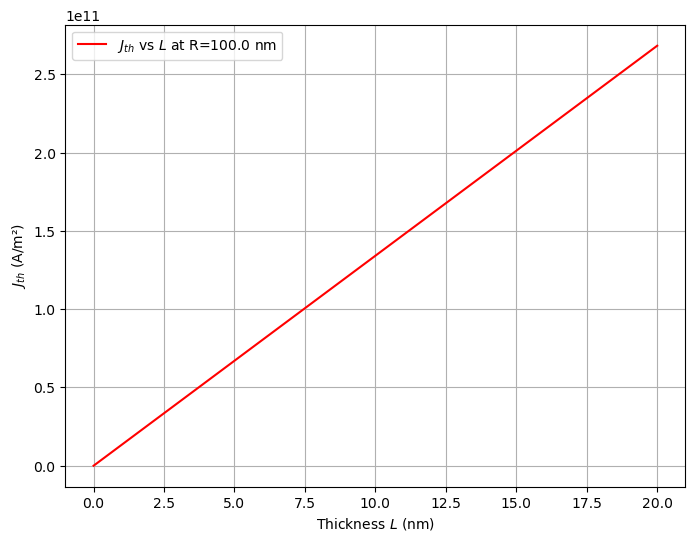

In [88]:
import numpy as np
from scipy.constants import mu_0
import matplotlib.pyplot as plt

m_e = 9.1e-31
c = 0.02
gyro_ratio = 1.76e11  # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = 2.8e10  # Gyroratio (Hz/T)
alpha_g = 0.01  # Gilbert Damping Constant
aplied_field = 0.350  # Applied Field (Tesla)
saturation_magnetization = 0.73  # Saturation Magnetization (T)
saturation_magnetization_A_M = saturation_magnetization / mu_0
epsilon = 0.5  # Spin Polarization Efficiency
lande_factor = -2.002  # Electron Lande Factor
bhor_magneton = 9.27e-24  # Bohr magneton (J/T)
e = 1.602e-19  # Electron Charge (C)

R = 100e-9

def Compute_I_th(L, R):
    omega_0 = gyro_ratio * (aplied_field - saturation_magnetization)
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    return I_th

def compute_current_density(L, R):
    I_th = Compute_I_th(L, R)
    J = I_th / (np.pi * (R ** 2))  # Corrected exponentiation operator
    return J

L_values = np.linspace(0e-9, 20e-9, 100)
J_values = np.array([compute_current_density(L, R) for L in L_values])

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(L_values * 1e9, J_values, label=f"$J_{{th}}$ vs $L$ at R={R * 1e9} nm", color="red")
plt.xlabel('Thickness $L$ (nm)')
plt.ylabel(r'$J_{th}$ (A/m²)')
plt.legend()
plt.grid(True)
plt.show()


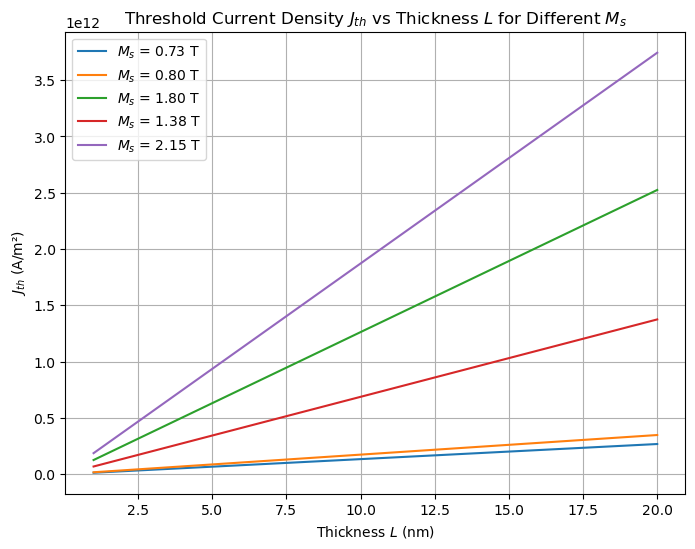

In [44]:
import numpy as np
from scipy.constants import mu_0
import matplotlib.pyplot as plt

# Constants
m_e = 9.1e-31
c = 0.02
gyro_ratio = 1.76e11  # Gyromagnetic ratio (1/Ts)
gyro_ratio_hz = 2.8e10  # Gyromagnetic ratio (Hz/T)
alpha_g = 0.01  # Gilbert Damping Constant
applied_field = 0.350  # Applied Field (Tesla)
epsilon = 0.5  # Spin Polarization Efficiency
lande_factor = -2.002  # Electron Lande Factor
bohr_magneton = 9.27e-24  # Bohr magneton (J/T)
e = 1.602e-19  # Electron Charge (C)
R = 100e-9  # Radius in meters

# Define a range of saturation magnetization values (in Tesla)
Ms_values = [0.73,0.8,1.8,1.38,2.15]  # You can adjust the number of points

def Compute_I_th(L, R, Ms):
    Ms_A_M = Ms / mu_0
    omega_0 = gyro_ratio * (applied_field - Ms)
    gamma_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bohr_magneton) / (2 * e * Ms_A_M * L * (np.pi * R**2))
    I_th = gamma_g / sigma
    return I_th

def compute_current_density(L, R, Ms):
    I_th = Compute_I_th(L, R, Ms)
    J = I_th / (np.pi * R**2)
    return J

L_values = np.linspace(1e-9, 20e-9, 100)  # Avoid L=0 to prevent division by zero

# Plotting
plt.figure(figsize=(8, 6))

for Ms in Ms_values:
    J_values = np.array([compute_current_density(L, R, Ms) for L in L_values])
    plt.plot(L_values * 1e9, J_values, label=f"$M_s$ = {Ms:.2f} T")

plt.xlabel('Thickness $L$ (nm)')
plt.ylabel(r'$J_{th}$ (A/m²)')
plt.title('Threshold Current Density $J_{th}$ vs Thickness $L$ for Different $M_s$')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\david\AppData\Local\Temp\ipykernel_26132\2822209430.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))


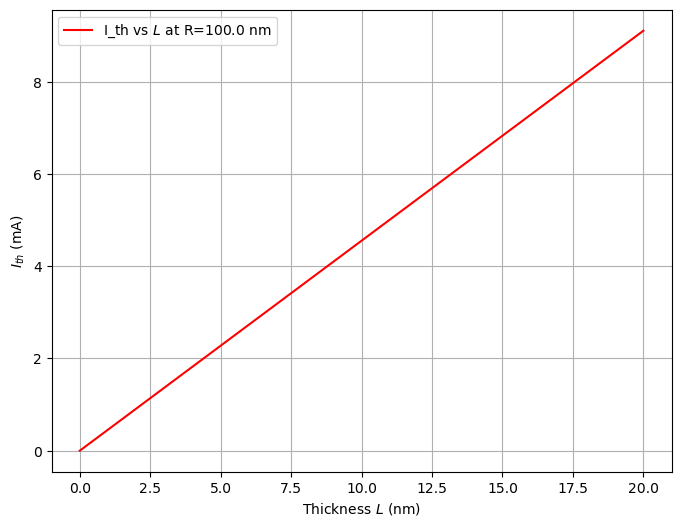

In [44]:
R = 100e-9

# Función para calcular I_th y T_relax
def Compute_I_th(L, R):
    omega_0 = gyro_ratio * (aplied_field - saturation_magnetization)
    gama_g = alpha_g * omega_0
    sigma = (epsilon * lande_factor * bhor_magneton) / (2 * e * saturation_magnetization_A_M * L * (np.pi * (R ** 2)))
    I_th = gama_g / sigma
    return I_th




L_values = np.linspace(0e-9,20e-9,100)
I_th_values = np.array([Compute_I_th(L,R) for L in L_values]) *1e3

# plot 
plt.figure(figsize=(8,6))
plt.plot(L_values*1e9,I_th_values, label=f"I_th vs $L$ at R={R*1e9} nm" , color="red")
plt.xlabel('Thickness $L$ (nm)')
plt.ylabel(r'$I_{th}$ (mA)')
plt.legend()
plt.grid(True)
plt.show()



### 3) Grid Search Results

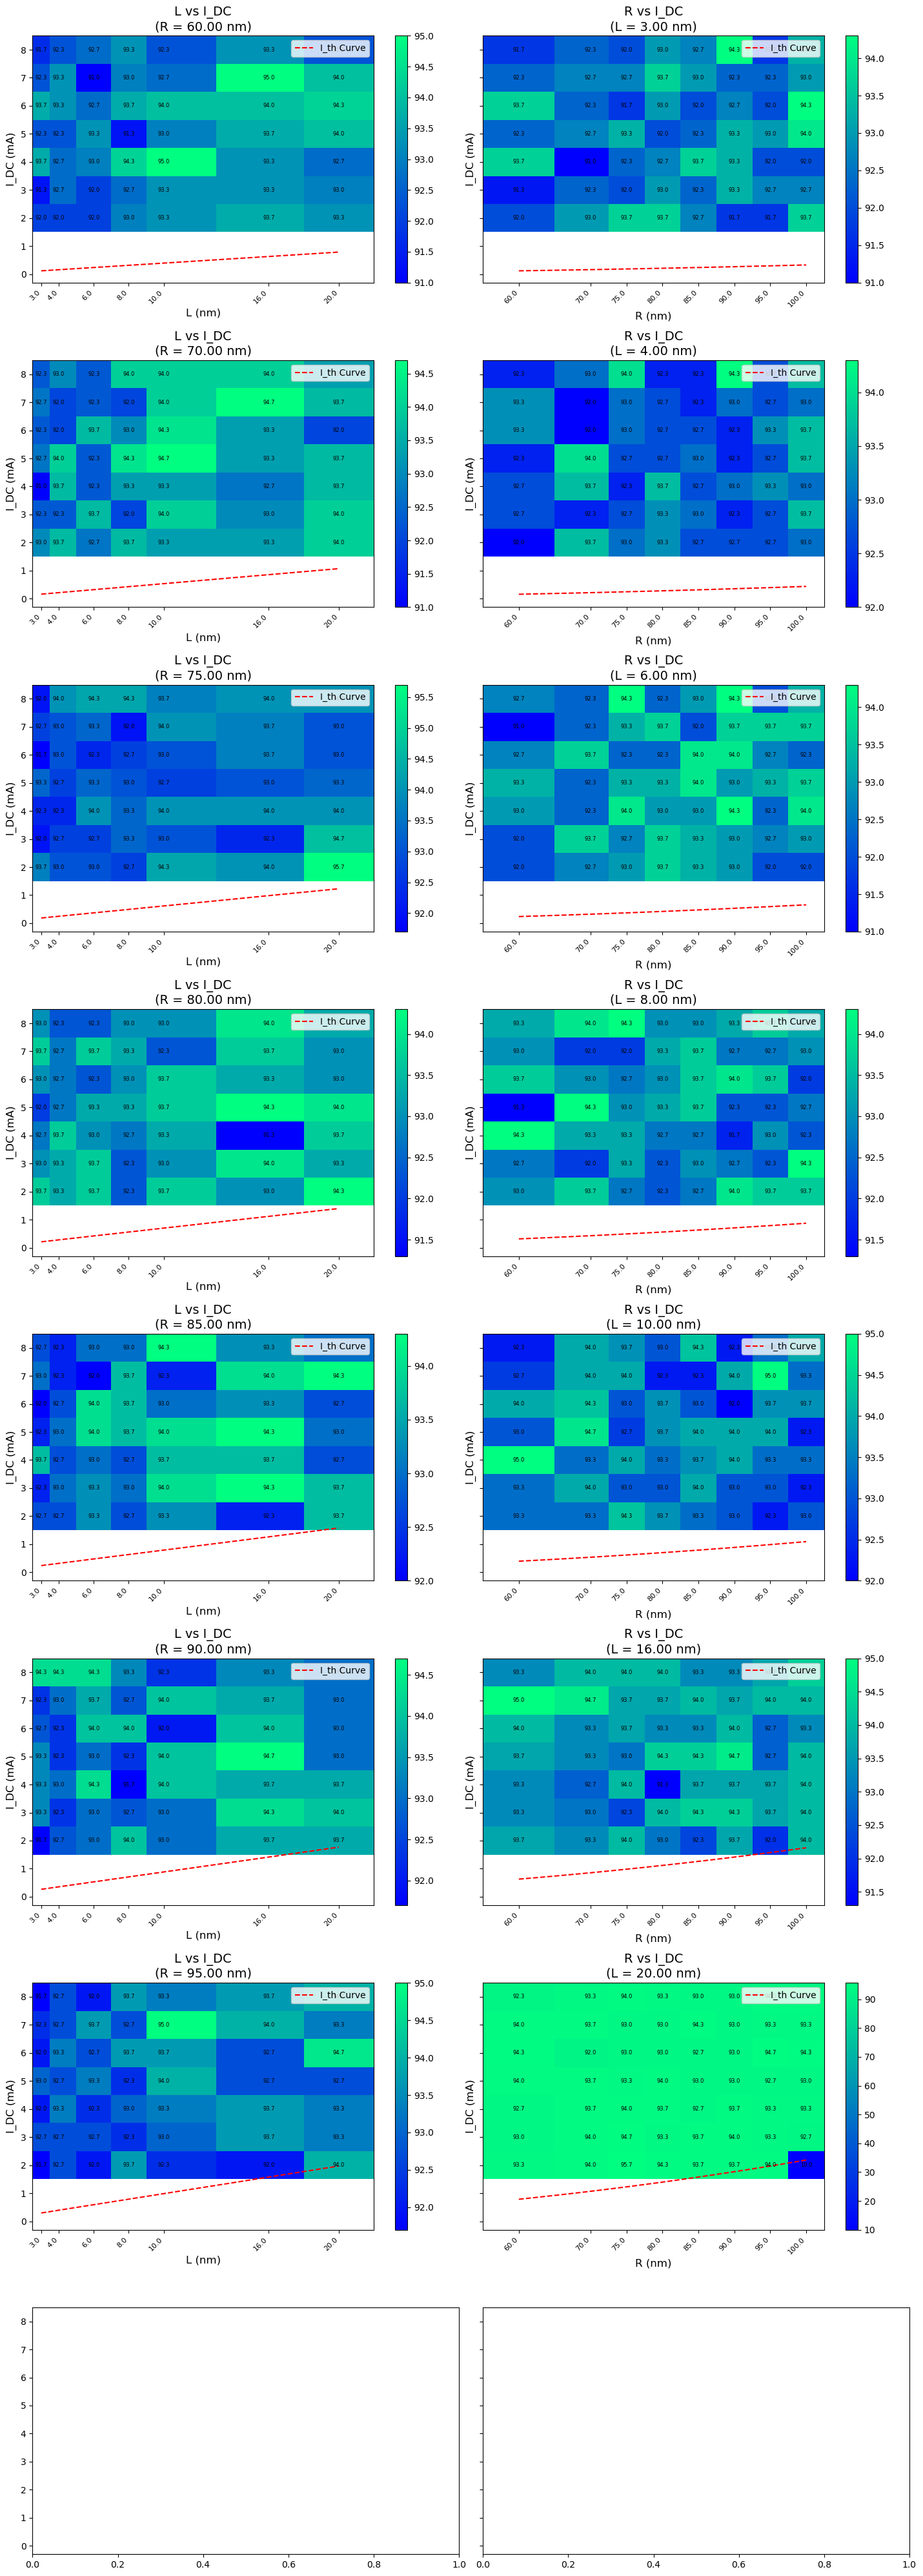

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Función para crear un heatmap utilizando pcolormesh y superponer la curva
def create_pcolormesh_with_curve(df, x, y, value, curve_x, curve_y, ax, title, xlabel, ylabel):
    # Crear la matriz para el heatmap
    heatmap_data = df.pivot_table(index=y, columns=x, values=value, aggfunc='mean').values
    x_labels = sorted(df[x].unique())
    y_labels = sorted(df[y].unique())
    
    # Mostrar el heatmap usando pcolormesh con shading='nearest'
    X, Y = np.meshgrid(x_labels, y_labels)
    cax = ax.pcolormesh(X, Y, heatmap_data, cmap="winter", shading='nearest', vmin=df[value].min(), vmax=df[value].max())
    
    # Añadir anotaciones en el heatmap
    for j in range(heatmap_data.shape[0]):
        for i in range(heatmap_data.shape[1]):
            cell_value = heatmap_data[j, i]
            if not np.isnan(cell_value):
                ax.text(x_labels[i], y_labels[j], f"{cell_value:.1f}", ha='center', va='center', fontsize=6, color="black")
    
    # Configurar etiquetas de los ejes
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Ajustar las etiquetas del eje x para que coincidan con los valores de x_labels
    ax.set_xticks(x_labels)
    ax.set_xticklabels([f"{label:.1f}" for label in x_labels], rotation=45, ha='right', fontsize=8)
    
    # Superponer la curva en el mismo gráfico
    ax.plot(curve_x, curve_y, color="red", linestyle="--", linewidth=1.5, label="I_th Curve")
    ax.legend(loc="upper right")
    
    # Añadir barra de color
    plt.colorbar(cax, ax=ax)

# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\david\Desktop\RESULTS\UniformState\simulation_results_uniform_2.csv')

# Filtrar los datos donde rango_I_in == 4
df_filtered = df[df['rango_I_in'] == 4]

# Asegurarse de que Accuracy_Test está entre 0 y 1
df_filtered['Accuracy_Test'] = (df_filtered['Accuracy_Test'].clip(0, 1) * 100).round(1)

# Convertir L y R a nanómetros
df_filtered['L_nm'] = df_filtered['L'] * 1e9
df_filtered['R_nm'] = df_filtered['R'] * 1e9

# Convertir I_DC_Vortex a miliamperios
df_filtered['I_DC_Vortex_mA'] = (df_filtered['I_DC_Vortex'] * 1e3).astype(int)

# Filtrar para excluir valores donde I_DC_Vortex_mA >= 9
df_filtered = df_filtered[df_filtered['I_DC_Vortex_mA'] < 9]

# Valores únicos de R y L
unique_R = sorted(df_filtered['R'].unique())
unique_L = sorted(df_filtered['L'].unique())

# Crear una figura con subplots para todos los valores únicos de R y L
fig, axs = plt.subplots(len(unique_R), 2, figsize=(16, len(unique_R) * 5), sharey=True)
plt.subplots_adjust(hspace=0.5)

# Iterar sobre los valores únicos de R y L para crear los heatmaps y curvas
for i, (r_val, l_val) in enumerate(zip(unique_R, unique_L)):

    # Filtrar por el valor de R
    df_L_vs_I = df_filtered[df_filtered['R'] == r_val]
    # Filtrar por el valor de L
    df_R_vs_I = df_filtered[df_filtered['L'] == l_val]

    # Generar puntos para la curva I_th en función de L
    L_values = np.linspace(3e-9, 20e-9, 100) * 1e9  # Convertir a nm
    I_th_values_L = np.array([Compute_I_th(L, r_val) for L in L_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para L vs I_DC
    create_pcolormesh_with_curve(
        df=df_L_vs_I,
        x='L_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=L_values,
        curve_y=I_th_values_L,
        ax=axs[i, 0],
        title=f'L vs I_DC\n(R = {r_val * 1e9:.2f} nm)',
        xlabel='L (nm)',
        ylabel='I_DC (mA)'
    )
    
    # Generar puntos para la curva I_th en función de R
    R_values = np.linspace(60e-9, 100e-9, 100) * 1e9  # Convertir a nm
    I_th_values_R = np.array([Compute_I_th(l_val, R) for R in R_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para R vs I_DC
    create_pcolormesh_with_curve(
        df=df_R_vs_I,
        x='R_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=R_values,
        curve_y=I_th_values_R,
        ax=axs[i, 1],
        title=f'R vs I_DC\n(L = {l_val * 1e9:.2f} nm)',
        xlabel='R (nm)',
        ylabel='I_DC (mA)'
    )

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()

